# GRADIENT DESCENT

## Implementation:
- Vanilla Gradient Descent.
- Graphing vectors (Grad vectors / Jacobian vectors) through each iteration.

## Note:
- This implementation applies only for functions which have 2 variables only.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Defines functions
f = lambda x, y : x**2 + y**2
dfdx = lambda x, y: 2*x
dfdy = lambda x, y: 2*y

In [3]:
# Graphs Contour plot for f(x, y).
def graph_contour():
    x_space = np.linspace(-5, 5, 100)
    y_space = np.linspace(-5, 5, 100)
    [X, Y] = np.meshgrid(x_space, y_space)
    fig, axes = plt.subplots(1, 1)

    # fill contour plot 
    axes.contourf(X, Y, f(X, Y)) 
    axes.set_title('Contour Plot')
    axes.set_xlabel('x') 
    axes.set_ylabel('y') 
    plt.show()

    
# Graphs f(x,y) in 3D dimension.
def graph_3D():
    x_space = np.array(range(-5,5))
    y_space = np.array(range(-5,5))
    x, y = np.meshgrid(x_space, y_space)
    fig = plt.figure()
    axes = fig.gca(projection="3d")
    axes.plot_surface(x, y, f(x, y), cmap="rainbow")
    axes.set_title('3D Dimension')
    axes.set_xlabel('x')
    axes.set_ylabel('y')
    axes.set_zlabel('f(x,y)')
    plt.contour(x, y, f(x, y), cmap="rainbow")
    plt.show()

In [4]:
def gradient_descent_3d(x_start, y_start, max_iteraton=10, eta=0.05, threshold=0.001, plot=False):
    # Plot 2D representation of array with starting point as a red marker
    if plot:
        x_space = np.linspace(-5, 5, 100)
        y_space = np.linspace(-5, 5, 100)
        [X, Y] = np.meshgrid(x_space, y_space)
        fig, axes = plt.subplots(1, 1)
        plt.plot(x_start, y_start, 'r+')
        
        # fill contour plot 
        axes.contourf(X, Y, f(X, Y)) 
        axes.set_title('Contour Plot')
        axes.set_xlabel('x') 
        axes.set_ylabel('y')
    
    curr_x = x_start
    curr_y = y_start
    curr_min = None
    
    vector_modulus = lambda x, y: math.sqrt(x**2 + y**2)
    global_min = vector_modulus(x_start, y_start)
    
    # Apply Gradient Descent
    for i in range(1, max_iteration + 1):
                
        prev_x = curr_x
        prev_y = curr_y
        
        tmp_x = curr_x - eta * dfdx(curr_x, curr_y)
        tmp_y = curr_y - eta * dfdy(curr_x, curr_y)
        curr_x = tmp_x
        curr_y = tmp_y
        
        curr_min = vector_modulus(curr_x, curr_y)

        if (prev_x == curr_x and prev_y == curr_y) or (global_min - curr_min <= threshold):
            print(f"f(x, y) converged in {i} steps with starting point at ({x_start}, {y_start}) with threshold={threshold}")
            break
        elif global_min > curr_min:
            global_min = curr_min
        # print(f"ITER: {i} with GLOBAL_MIN = {global_min}, CURR_MIN = {curr_min}, isEqual = {global_min == curr_min}")
        
        if plot:
            plt.plot([curr_x, prev_x], [curr_y, prev_y],marker = '.')
    if plot:
        plt.show()
    print(f"ITER: {i} with GLOBAL_MIN = {global_min}, CURR_MIN = {curr_min}")

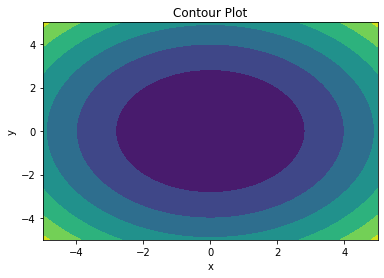

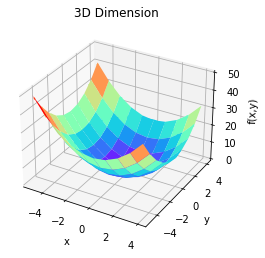

In [5]:
# Basic graphs
graph_contour()
graph_3D()

In [6]:
# Defines variables
x_start = 3 # starting x coordinate
y_start = 4 # starting y coordinate
max_iteration = 20
# number of steps
eta = 0.17 # learning rate
threshold = 0.005 # Tell the algorithm when to stop

f(x, y) converged in 16 steps with starting point at (3, 4) with threshold=0.005


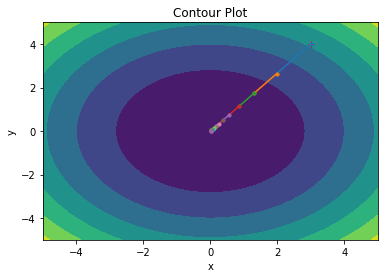

ITER: 16 with GLOBAL_MIN = 0.009820396830534105, CURR_MIN = 0.006481461908152511


In [7]:
# Apply Gradient Descent Algorithm.
gradient_descent_3d(x_start, y_start, max_iteration, eta, threshold, plot=True)